In [ ]:
#numpy import for array
import numpy as np

# matplotlib import for graph
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.integrate import odeint #odeint import

# Model 1

In [ ]:
#define function of dx_dt, dy_dt, dz_dt
def dxdydzde(c,t,Iabcd):  #IabcE: list of [I,a,b,c,E]
    (x,y,z,e)=c #xyz value
    I=Iabcd[0]
    a=Iabcd[1]
    b=Iabcd[2]
    cc=Iabcd[3]
    d=Iabcd[4]
    E=d*z
    return np.array([I-a*E*x, a*E*x-b*y, b*y-cc*z, E]) #caculate dx, dy, dz

In [ ]:
#set the model's initial condition and parameters
y0=np.array([1,1,1,1]) #[X,Y,Z,E] #initial value
params=np.array([0.75,1.4,1.0,1.0,1.8]) #[I,a,b,c,d] #parameter

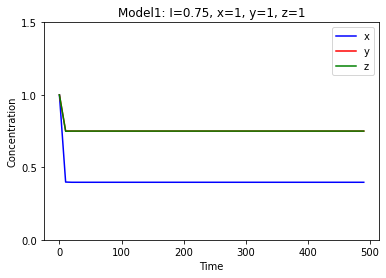

In [ ]:
t=np.arange(0,500,10)
y=odeint(dxdydzde,y0,t,args=(params,))

plt.plot(t,y[:,0],label='x',color='b')
plt.plot(t,y[:,1],label='y',color='r')
plt.plot(t,y[:,2],label='z',color='g')

plt.xlabel("Time")
plt.ylabel("Concentration")
plt.title(f"Model1: I={params[0]}, x={y0[0]}, y={y0[1]}, z={y0[2]}")
plt.yticks(np.arange(0,1.6,0.5))
plt.legend()

# Model 2

In [ ]:
#define function of dx_dt, dy_dt, dz_dt
def dxdydzde(c,t,Iabcd):  #IabcE: list of [I,a,b,c,E]
    (x,y,z,e)=c #xyz value
    I=Iabcd[0]
    a=Iabcd[1]
    b=Iabcd[2]
    cc=Iabcd[3]
    d=Iabcd[4]
    E=z/(d+z)
    return np.array([I-a*E*x, a*E*x-b*y, b*y-cc*z, E]) #caculate dx, dy, dz

In [ ]:
#set the model's initial condition and parameters
y0=np.array([1,1,1,1]) #[X,Y,Z,E] #initial value
params=np.array([0.75,1.4,1,1,1.8]) #[I,a,b,c,d] #parameter

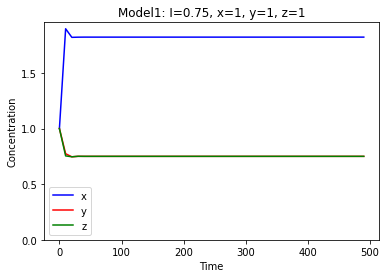

In [ ]:
t=np.arange(0,500,10)
y=odeint(dxdydzde,y0,t,args=(params,))

plt.plot(t,y[:,0],label='x',color='b')
plt.plot(t,y[:,1],label='y',color='r')
plt.plot(t,y[:,2],label='z',color='g')

plt.xlabel("Time")
plt.ylabel("Concentration")
plt.title(f"Model1: I={params[0]}, x={y0[0]}, y={y0[1]}, z={y0[2]}")
plt.yticks(np.arange(0,1.6,0.5))
plt.legend()

# Model 3

In [ ]:
#define function of dx_dt, dy_dt, dz_dt
def dxdydzde(v,t,*param):  
    x,y,z=v #xyz value
    I,a,b,c,d,E,n=param #input, a, b, c, d, enzyme initial, n(z^n/(d+z^n))

    E=((z**n)/(d+z**n))*E #calculate enzyme
    dx=I-a*(E)*x #calculate dx/dt
    dy=a*(E)*x-b*y #calculate dy/dt
    dz=b*y-c*z #calculate dz/dt

    return [dx,dy,dz] #return next [x,y,z] value

In [ ]:
#set the model's initial condition and parameters
y0=np.array([1,1,1]) #[X,Y,Z] #initial value
params=np.array([0.75,1.6,1.0,1.0,2.0,1,2]) #[I,a,b,c,d,ei,n] #parameter
param=tuple(params) #change 'params' array to tuple

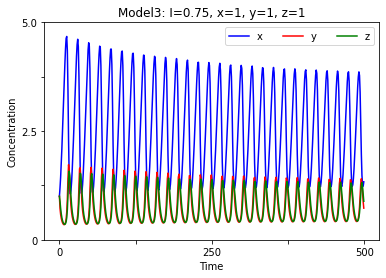

In [377]:
t=np.arange(0,500)
y=odeint(dxdydzde,y0,t,args=param)
#print(y[:100])

plt.plot(t,y[:,0],label='x',color='b')
plt.plot(t,y[:,1],label='y',color='r')
plt.plot(t,y[:,2],label='z',color='g')

plt.xlabel("Time")
plt.ylabel("Concentration")
plt.title(f"Model3: I={params[0]}, x={y0[0]}, y={y0[1]}, z={y0[2]}")
plt.yticks(np.arange(0, 5.1, 1.25), labels=['0', '', '2.5', '', '5.0'])
plt.xticks(np.arange(0, 501, 125), labels=['0', '', '250', '', '500'])
plt.legend(ncol=3)